In [457]:
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from IPython import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [458]:
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 1000)

# Loading training data from the CSV

In [459]:
#Importing the dataset
dataset = pd.read_csv('heart.csv')
df = pd.DataFrame(dataset)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Data Preparation - Step 1

#### This data set has 12 columns and there's no columns that can specifically identifying a patient.So no need of removing a column.

In [460]:
#Get features name
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [461]:
## Display a description of the DataFrame with summary statistics
print("Describe our DataFrame :\n")
# Prints a summary of numerical columns with statistics such as count, mean, standard deviation, min, and max,
# rounding the results to two decimal places for readability
print(df.describe().round(2))
# Display DataFrame information
print("\nDataframe information:\n")
# Prints information about the DataFrame, including the index, column names, non-null counts, and data types
print(df.info())

Describe our DataFrame :

          Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak  \
count  918.00     918.00       918.00     918.00  918.00   918.00   
mean    53.51     132.40       198.80       0.23  136.81     0.89   
std      9.43      18.51       109.38       0.42   25.46     1.07   
min     28.00       0.00         0.00       0.00   60.00    -2.60   
25%     47.00     120.00       173.25       0.00  120.00     0.00   
50%     54.00     130.00       223.00       0.00  138.00     0.60   
75%     60.00     140.00       267.00       0.00  156.00     1.50   
max     77.00     200.00       603.00       1.00  202.00     6.20   

       HeartDisease  
count        918.00  
mean           0.55  
std            0.50  
min            0.00  
25%            0.00  
50%            1.00  
75%            1.00  
max            1.00  

Dataframe information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non

In [462]:
#Checking the missing value
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

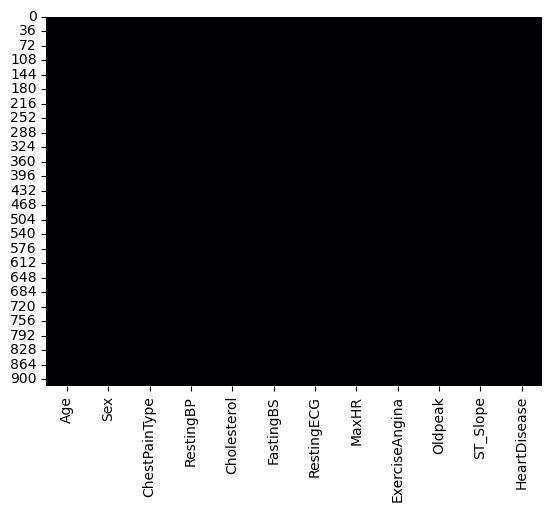

In [463]:
#Visualizing the missing value by seaborn library
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

# Data Cleanup

In [464]:
# Clean and replace invalid entries in the DataFrame
df = df.map(
  lambda x: x if x is np.NaN or not \
    isinstance(x, str) else str(x).strip('_')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
# Get the dimensions of the DataFrame (rows, columns)
df.shape

(918, 12)

In [465]:
# Display the data types of each column in the DataFrame
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Data Preparation - Step 2 

####  Oldpeak column shouldn't be an Object type as it has all numeric values. Let's convert that column to a Numeric Type

In [466]:
# Convert the 'Oldpeak' column to a numeric data type, handling errors by setting invalid parsing as NaN
df['Oldpeak'] = pd.to_numeric(df['Oldpeak'], errors='coerce').astype('float')

In [467]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Missing Values 

In [468]:
# Calculate the sum of missing values in each column
missing_values_sum = df.isna().sum()

# Calculate the percentage of missing values for each column
total_rows = df.shape[0]
missing_values_percentage = (missing_values_sum / total_rows) * 100

# Get the data type of the column as well
column_datatypes = df.dtypes

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Data Type': column_datatypes,
    'Missing Values': missing_values_sum,
    'Percentage Missing (%)': missing_values_percentage
})

# Display the missing values sum and percentage
print(missing_info)

               Data Type  Missing Values  Percentage Missing (%)
Age                int64               0                     0.0
Sex               object               0                     0.0
ChestPainType     object               0                     0.0
RestingBP          int64               0                     0.0
Cholesterol        int64               0                     0.0
FastingBS          int64               0                     0.0
RestingECG        object               0                     0.0
MaxHR              int64               0                     0.0
ExerciseAngina    object               0                     0.0
Oldpeak          float64               0                     0.0
ST_Slope          object               0                     0.0
HeartDisease       int64               0                     0.0


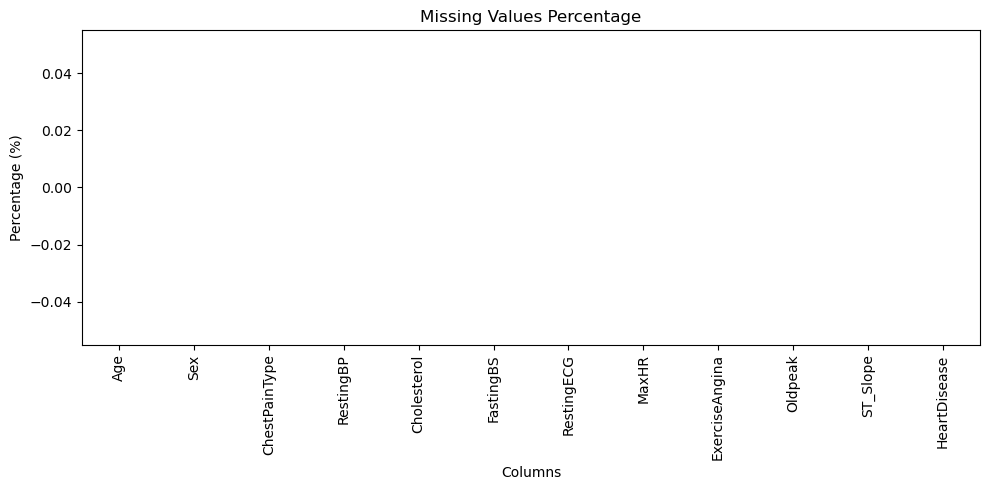

In [469]:
# Create a bar plot for missing values percentage 
plt.figure(figsize=(10, 5))

missing_values_percentage.plot(kind='bar', color='lightcoral')
plt.title('Missing Values Percentage')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')

# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

#### According to the above results, no missing values were found in our dataset.

# Categorical Data:  

In [470]:
#Encoding categorical Data
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 2})
df['ChestPainType'] = df['ChestPainType'].replace({'ATA': 1, 'NAP': 2, 'ASY': 3, 'TA': 4})
df['FastingBS'] = df['FastingBS'].replace({0: 1, 1: 2})
df['RestingECG'] = df['RestingECG'].replace({'Normal': 1, 'ST': 2, 'LVH': 3})
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N': 1, 'Y': 2})
df['ST_Slope'] = df['ST_Slope'].replace({'Up': 1, 'Flat': 2, 'Down': 3})
df['HeartDisease'] = df['HeartDisease'].replace({1: 1, 0: 2})

In [471]:
#separate categorical data/numerical data
df_num = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
df_cat = df[['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']]

df_num_name = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_cat_name = ['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

In [472]:
#Easier way to separate numerical value and categorical value if we have many features 
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features,'\n')
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease 

Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


# Outliers

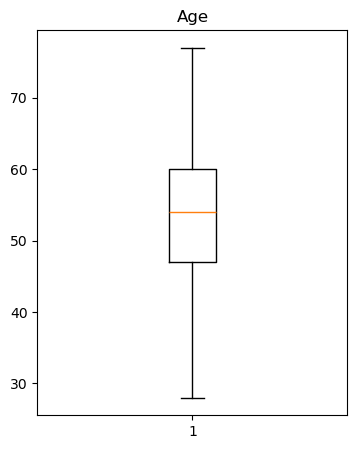

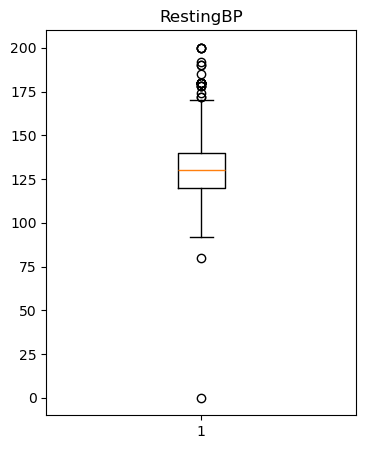

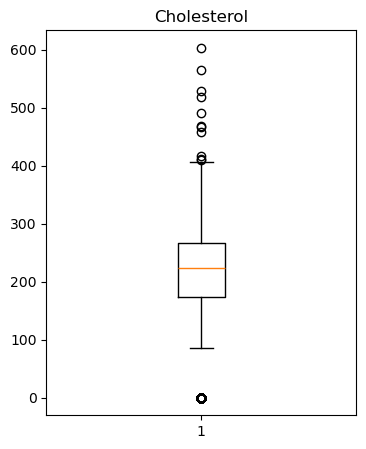

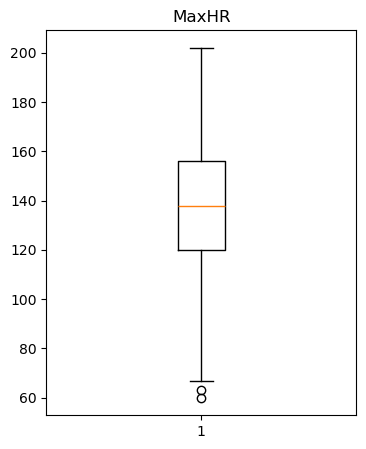

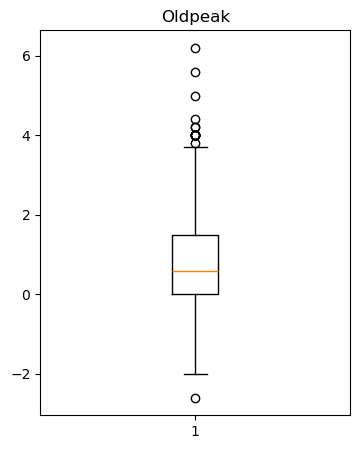

In [473]:
for feature in df_num_name:
    plt.figure(figsize=(4,5))
    plt.boxplot(df[feature])
    plt.title(f'{feature}')
    plt.show()

In [474]:
#Detecting outliers
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [475]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check Age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check RestingBP outliers 
number of outliers: 28
max outlier value: 200
min outlier value: 0

-Check Cholesterol outliers 
number of outliers: 183
max outlier value: 603
min outlier value: 0

-Check MaxHR outliers 
number of outliers: 2
max outlier value: 63
min outlier value: 60

-Check Oldpeak outliers 
number of outliers: 16
max outlier value: 6.2
min outlier value: -2.6



In [476]:
# Define a function to generate a histogram for a specific column
def generate_histogram(data, column_name):
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column_name], bins=20, kde=True)  # Adjust the number of bins as needed
    
    # Customize the y-axis tick labels
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.show()

In [477]:
# Define a function to generate a box plot for a specific column
def generate_boxplot(data, column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[column_name])
    
    # Customize the y-axis tick labels
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    
    plt.ylabel(column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()

# Age Column Data Analysis

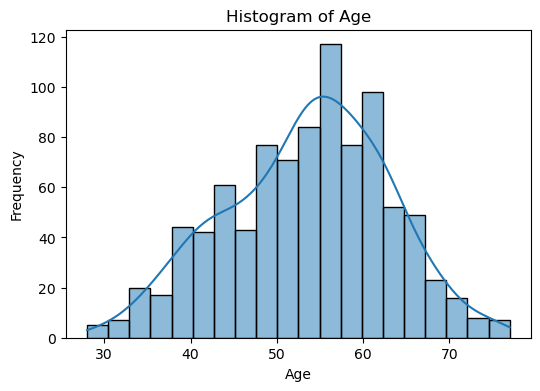

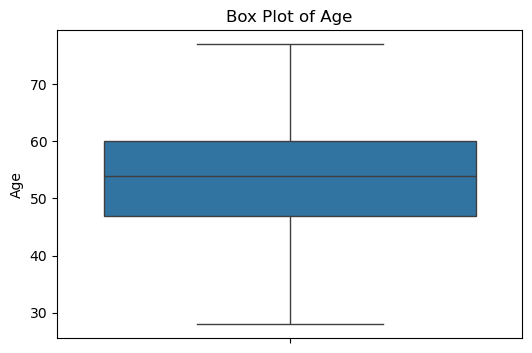

In [478]:
# Generate and display a histogram for the 'Age' column in the DataFrame
generate_histogram(df, 'Age')
# Generate and display a boxplot for the 'Age' column in the DataFrame
generate_boxplot(df, 'Age')

# Cholesterol Column Data Analysis

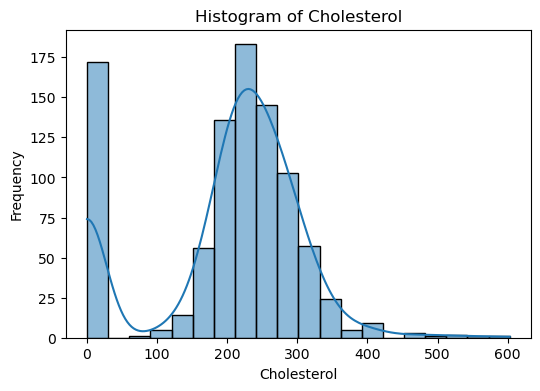

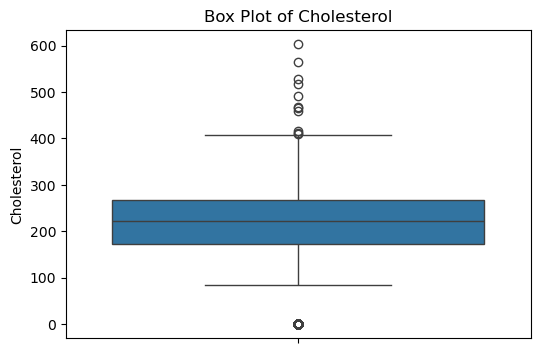

In [479]:
# Generate and display a histogram for the 'Cholesterol' column in the DataFrame
generate_histogram(df, 'Cholesterol')
# Generate and display a boxplot for the 'Cholesterol' column in the DataFrame
generate_boxplot(df, 'Cholesterol')

### As per the above diagram, the Cholesterol column contains data that doesn’t seems to be practical. We must exclude those data considering the optimal Cholesterol level to be 60 to 700 .

In [480]:
# Checking the number of Zeros present in the Cholesterol
print(f" original shape of Cholesterol : {df.Cholesterol.shape}")

ziro_Cholesterol = df[df['Cholesterol'] == 0]
print(f" zero values of Cholesterol : {ziro_Cholesterol.shape}")

non_ziro_Cholesterol = df[df['Cholesterol'] != 0]
print(f" non zero values of Cholesterol : {non_ziro_Cholesterol.shape}")

 original shape of Cholesterol : (918,)
 zero values of Cholesterol : (172, 12)
 non zero values of Cholesterol : (746, 12)


### The cholesterol value cannot be zero. So, zeros must be filled with the median value

In [481]:
## Converting Zero Value of Cholesterol to NaN Value
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,1,1,172,1,0.0,1,2
1,49,2,2,160,180.0,1,1,156,1,1.0,2,1
2,37,1,1,130,283.0,1,2,98,1,0.0,1,2
3,48,2,3,138,214.0,1,1,108,2,1.5,2,1
4,54,1,2,150,195.0,1,1,122,1,0.0,1,2


In [482]:
## NaN value of Cholesterol is filled with median value
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df["Cholesterol"]

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
5      339.0
6      237.0
7      208.0
8      207.0
9      284.0
10     211.0
11     164.0
12     204.0
13     234.0
14     211.0
15     273.0
16     196.0
17     201.0
18     248.0
19     267.0
20     223.0
21     184.0
22     201.0
23     288.0
24     215.0
25     209.0
26     260.0
27     284.0
28     468.0
29     188.0
30     518.0
31     167.0
32     224.0
33     172.0
34     186.0
35     254.0
36     306.0
37     250.0
38     177.0
39     227.0
40     230.0
41     294.0
42     264.0
43     259.0
44     175.0
45     318.0
46     223.0
47     216.0
48     340.0
49     289.0
50     233.0
51     205.0
52     224.0
53     245.0
54     180.0
55     194.0
56     270.0
57     213.0
58     365.0
59     342.0
60     253.0
61     254.0
62     224.0
63     277.0
64     202.0
65     260.0
66     297.0
67     225.0
68     246.0
69     412.0
70     265.0
71     215.0
72     182.0
73     218.0
74     268.0
75     163.0
76     529.0

In [483]:
df = df[(df['Cholesterol'] >= 60) & (df['Cholesterol'] <= 700)]

df.shape

(918, 12)

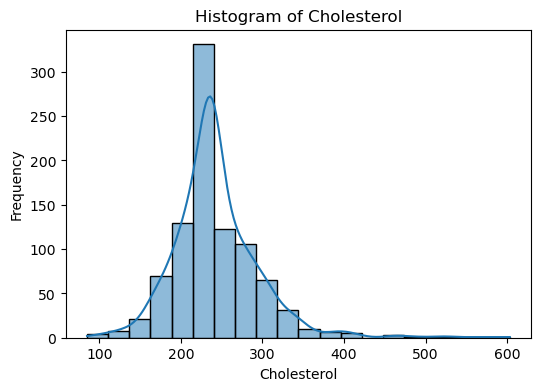

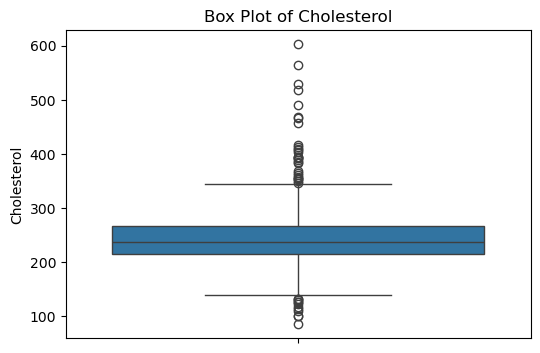

In [484]:
# Regenerate and display a histogram for the 'Cholesterol' column in the DataFrame
generate_histogram(df, 'Cholesterol')
# Regenerate and display a boxplot for the 'Cholesterol' column in the DataFrame
generate_boxplot(df, 'Cholesterol')

# Resting Blood Pressure Column Data Analysis

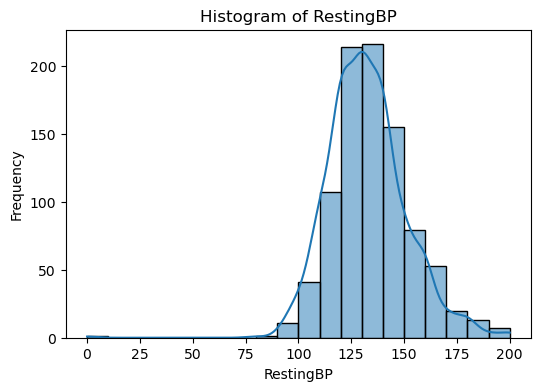

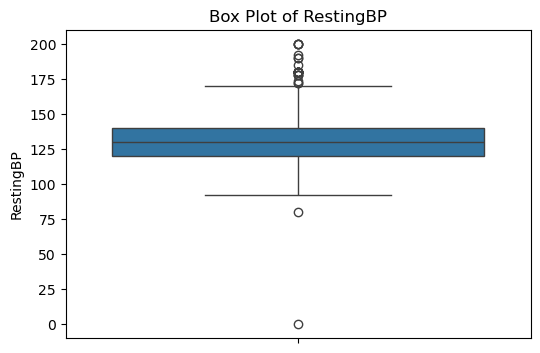

In [485]:
# Regenerate and display a histogram for the 'RestingBP' column in the DataFrame
generate_histogram(df, 'RestingBP')
# Regenerate and display a boxplot for the 'RestingBP' column in the DataFrame
generate_boxplot(df, 'RestingBP')

# Based on the histogram and boxplot, it appears that RestingBP (Resting Blood Pressure) should not contain zero values. Let’s identify and remove any rows where RestingBP is zero, as such values likely represent errors or missing data

In [486]:
#Checking the smallest and largest RestingBP values in dataset
print(f"smallest values :\n{df.RestingBP.nsmallest(3)}")
print(f"largest values :\n{df.RestingBP.nlargest(3)}")

smallest values :
449     0
314    80
227    92
Name: RestingBP, dtype: int64
largest values :
241    200
365    200
399    200
Name: RestingBP, dtype: int64


In [487]:
#Normally Blood Pressure can not be zero value , but in this dataset we have 1 sample
ziro_RestingBP = df[df['RestingBP'] == 0]
ziro_RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,2,0,237.0,1,1,155,1,1.5,2,1


In [488]:
#We should remove this row 
df = df.drop(df[(df['RestingBP'] == 0)].index) 

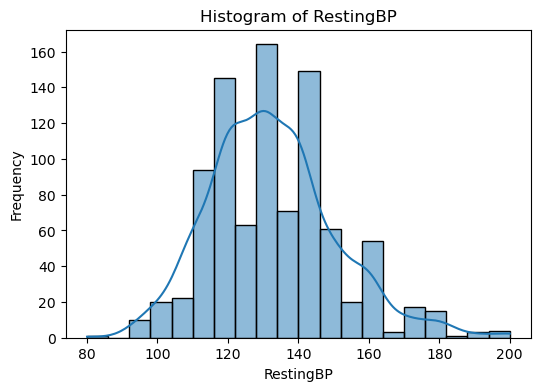

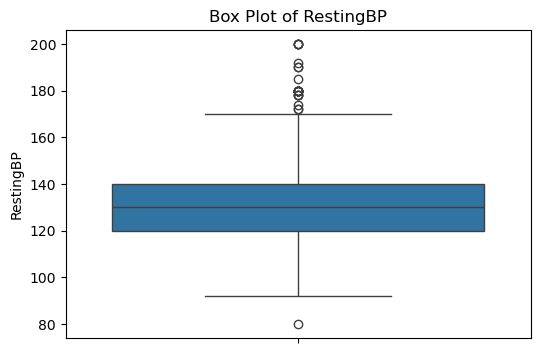

In [489]:
# Regenerate and display histogram and boxplot for the 'RestingBP' column in the DataFrame
generate_histogram(df, 'RestingBP')
generate_boxplot(df, 'RestingBP')

# Oldpeak Column Data Analysis

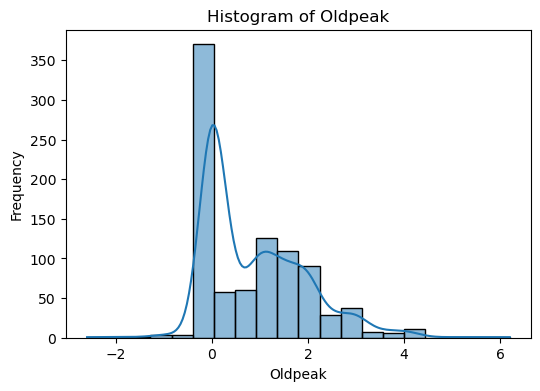

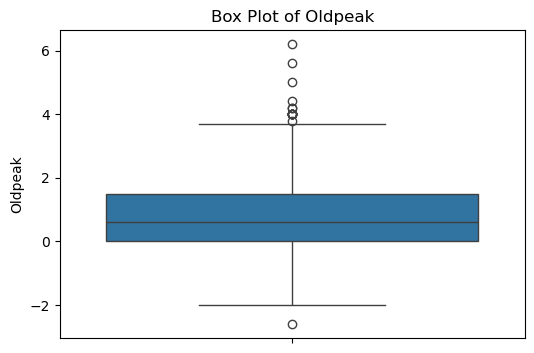

In [490]:
# Generate and display histogram and boxplot for the 'Oldpeak' column in the DataFrame
generate_histogram(df, 'Oldpeak')
generate_boxplot(df, 'Oldpeak')

In [491]:
#Checking the smallest and largest Oldpeak values in dataset
print(f"smallest values :\n{df.Oldpeak.nsmallest(3)}")
print(f"largest values :\n{df.Oldpeak.nlargest(3)}")

smallest values :
324   -2.6
413   -2.0
325   -1.5
Name: Oldpeak, dtype: float64
largest values :
850    6.2
771    5.6
166    5.0
Name: Oldpeak, dtype: float64


In [492]:
#According to the Oldpeak value range we haven`t minus value , but in this dataset we have 13 samples
ziro_Oldpeak = df[df['Oldpeak'] < 0]
ziro_Oldpeak

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,1,3,100,237.0,2,1,109,1,-0.9,2,1
324,46,1,3,100,237.0,2,2,133,1,-2.6,2,1
325,42,1,3,105,237.0,2,1,128,2,-1.5,3,1
326,45,1,2,110,237.0,1,1,138,1,-0.1,1,2
331,56,1,3,115,237.0,2,2,82,1,-1.0,1,1
332,38,1,2,100,237.0,1,1,179,1,-1.1,1,2
334,51,1,3,130,237.0,2,1,170,1,-0.7,1,1
335,62,1,4,120,237.0,2,3,134,1,-0.8,2,1
352,56,1,3,120,237.0,1,2,100,2,-1.0,3,1
407,62,1,3,115,237.0,2,1,72,2,-0.5,2,1


In [493]:
#We should remove those rows 
df = df.drop(df[(df['Oldpeak'] < 0)].index)

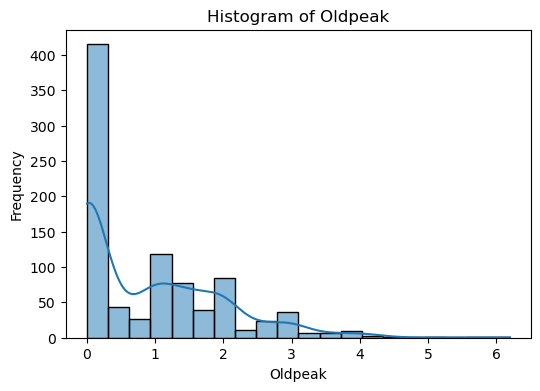

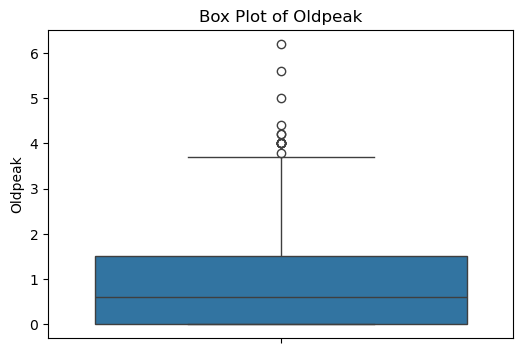

In [494]:
# Regenerate and display histogram and boxplot for the 'Oldpeak' column in the DataFrame
generate_histogram(df, 'Oldpeak')
generate_boxplot(df, 'Oldpeak')

# MaxHR Column Data Analysis

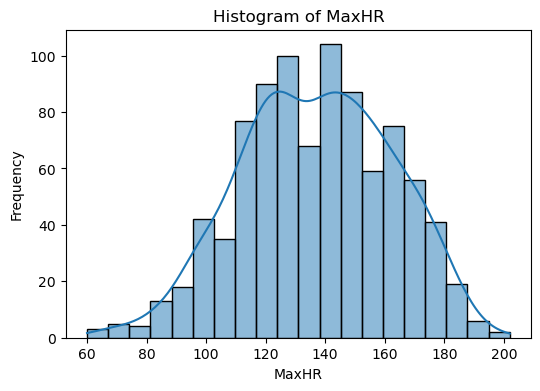

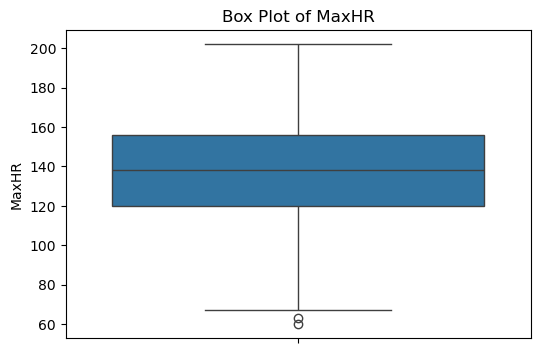

In [495]:
# Generate and display histogram and boxplot for the 'MaxHR' column in the DataFrame
generate_histogram(df, 'MaxHR')
generate_boxplot(df, 'MaxHR')

# Unique and Nununique value:  

In [496]:
#Showing the unique and nununique values
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          66
Cholesterol       221
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            43
ST_Slope            3
HeartDisease        2
dtype: int64

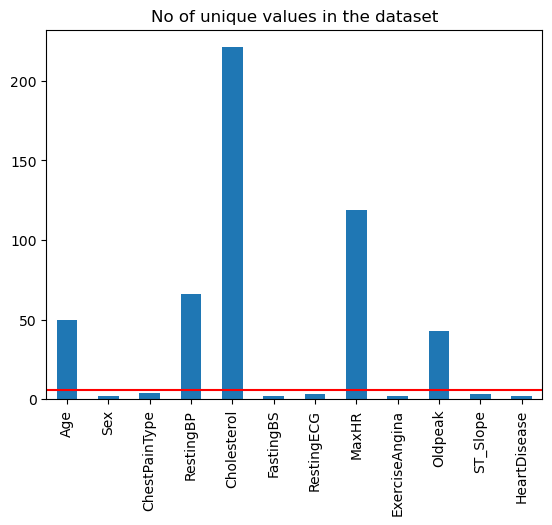

In [497]:
#Below the red horizontal line ,all features are contain categorical data
df.nunique().plot(kind='bar')
plt.title('No of unique values in the dataset')
plt.hlines(y=6, xmin=-2, xmax=15, color='red')
plt.show()

In [498]:
for i in range(0,7):
    print(f"\nShow the unique value of {df_cat_name[i]} column : {pd.unique(df[df_cat_name[i]])}\n")  


Show the unique value of Sex column : [1 2]


Show the unique value of ChestPainType column : [1 2 3 4]


Show the unique value of FastingBS column : [1 2]


Show the unique value of RestingECG column : [1 2 3]


Show the unique value of ExerciseAngina column : [1 2]


Show the unique value of ST_Slope column : [1 2 3]


Show the unique value of HeartDisease column : [2 1]



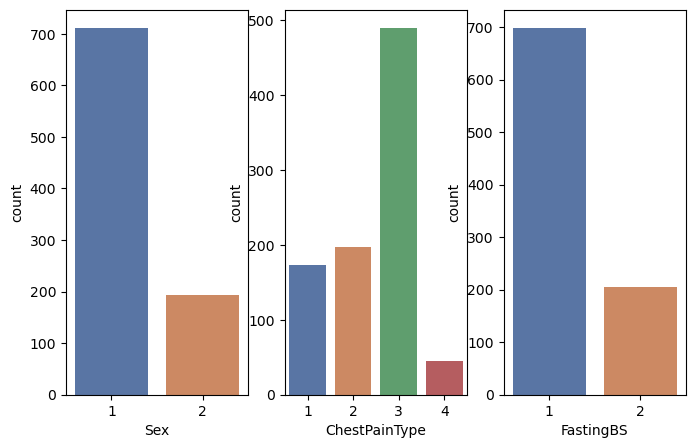

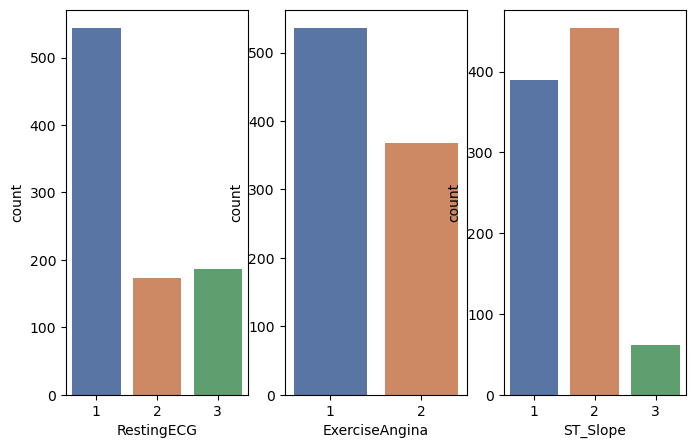

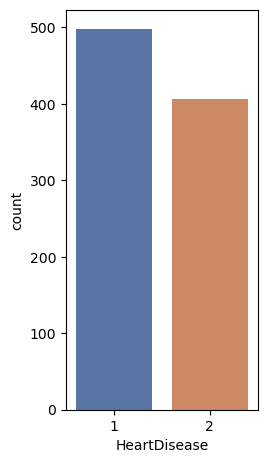

In [499]:
i = 0
while i < 7 :
    if i < 6 :
        plt.figure(figsize=(8,5))
        plt.subplot(1, 3, 1)
        sns.countplot(x=df_cat_name[i] , data=df, hue=df_cat_name[i], palette="deep", legend=False)
        plt.xlabel(str(df_cat_name[i]))
        i+=1

        plt.subplot(1, 3, 2)
        sns.countplot(x=df_cat_name[i] , data=df, hue=df_cat_name[i], palette="deep", legend=False)
        plt.xlabel(str(df_cat_name[i]))
        i+=1
    
        plt.subplot(1, 3, 3)
        sns.countplot(x=df_cat_name[i] , data=df, hue=df_cat_name[i], palette="deep", legend=False)
        plt.xlabel(str(df_cat_name[i]))
        i+=1
    elif i == 6 :
        plt.figure(figsize=(2.4,5))
        plt.subplot(1, 1, 1)
        sns.countplot(x=df_cat_name[i] , data=df, hue=df_cat_name[i], palette="deep", legend=False)
        plt.xlabel(str(df_cat_name[i]))
        i+=1   
        
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
        plt.show()

# Pie Chart

In [500]:
#Count of unique value in each feature
for c in range(6) :
    print(f"\nCount of {df_cat_name[c]} :\n{df[df_cat_name[c]].value_counts()}\n\n------------")


Count of Sex :
Sex
1    711
2    193
Name: count, dtype: int64

------------

Count of ChestPainType :
ChestPainType
3    489
2    197
1    173
4     45
Name: count, dtype: int64

------------

Count of FastingBS :
FastingBS
1    698
2    206
Name: count, dtype: int64

------------

Count of RestingECG :
RestingECG
1    544
3    187
2    173
Name: count, dtype: int64

------------

Count of ExerciseAngina :
ExerciseAngina
1    536
2    368
Name: count, dtype: int64

------------

Count of ST_Slope :
ST_Slope
2    454
1    389
3     61
Name: count, dtype: int64

------------


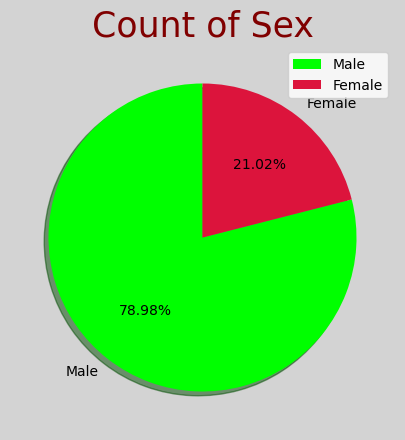

In [501]:
# Define labels and sizes for the 'Sex' category in the pie chart
sex_label = ['Male','Female']
sex_size = [725,193]
sex_explode = (0,0)
# Set up the figure for the pie chart
plt.figure(figsize=(8,5),facecolor='lightgray')
# Create a pie chart with the provided data
plt.pie( sex_size , explode=sex_explode , labels=sex_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90 , colors=['lime','crimson'])
plt.title("Count of Sex",fontsize=25,color='maroon')
plt.legend()

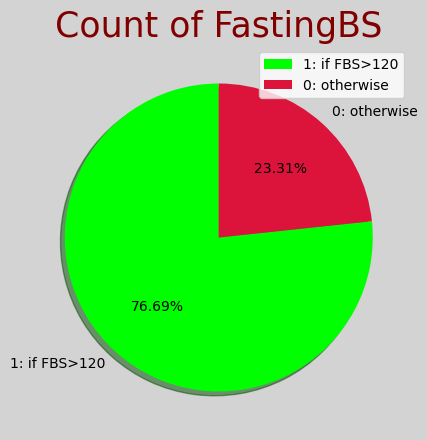

In [502]:
# Define labels and sizes for the 'FastingBS' category in the pie chart
FastingBS_label = ['1: if FBS>120','0: otherwise']
FastingBS_size = [704,214]
FastingBS_explode = (0,0)

# Set up the figure for the pie chart
plt.figure(figsize=(8,5),facecolor='lightgray')
# Create a pie chart with the provided data
plt.pie( FastingBS_size , explode=FastingBS_explode , labels=FastingBS_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90 , colors=['lime','crimson'])
plt.title("Count of FastingBS",fontsize=25,color='maroon')
plt.legend()

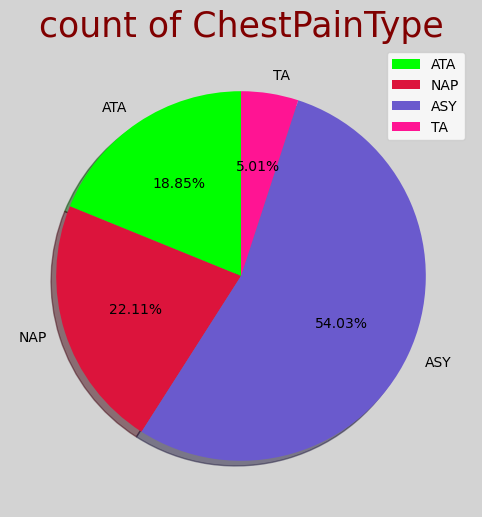

In [503]:
# Define labels and sizes for the 'ChestPainType' category in the pie chart
ChestPainType_label = ['ATA', 'NAP', 'ASY', 'TA']
ChestPainType_size = [173, 203, 496, 46]
ChestPainType_explode = (0, 0, 0, 0)
# Set up the figure for the pie chart
plt.figure(figsize=(8,6),facecolor='lightgray')
# Create a pie chart with the provided data
plt.pie( ChestPainType_size , explode=ChestPainType_explode , labels=ChestPainType_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors= ['lime','crimson', 'slateblue', 'deeppink'])
plt.title("count of ChestPainType",fontsize=25,color='maroon')
plt.legend()

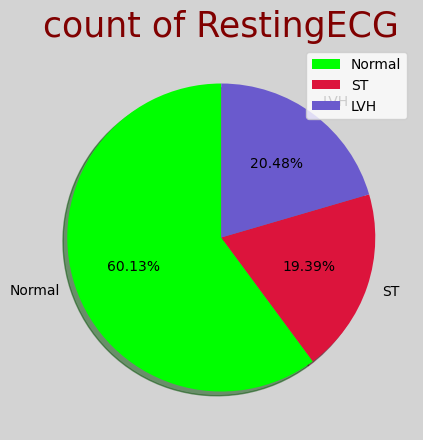

In [504]:
# Define labels and sizes for the 'RestingECG' category in the pie chart
RestingECG_label = ['Normal', 'ST', 'LVH']
RestingECG_size = [552, 178, 188]
RestingECG_explode = (0, 0, 0)
# Set up the figure for the pie chart
plt.figure(figsize=(8, 5),facecolor='lightgray')
# Create a pie chart with the provided data
plt.pie( RestingECG_size , explode=RestingECG_explode , labels=RestingECG_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['lime', 'crimson', 'slateblue'])
plt.title("count of RestingECG",fontsize=25,color='maroon')
plt.legend()

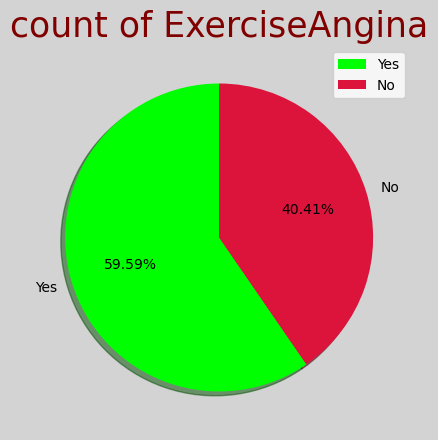

In [505]:
# Define labels and sizes for the 'ExerciseAngina' category in the pie chart
ExerciseAngina_label = ['Yes', 'No']
ExerciseAngina_size = [547, 371]
ExerciseAngina_explode = (0, 0)
# Set up the figure for the pie chart
plt.figure(figsize=(8, 5),facecolor='lightgray')
# Create a pie chart with the provided data
plt.pie( ExerciseAngina_size , explode=ExerciseAngina_explode , labels=ExerciseAngina_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['lime', 'crimson'])
plt.title("count of ExerciseAngina",fontsize=25,color='maroon')
plt.legend()

# Catplot

<Figure size 300x400 with 0 Axes>

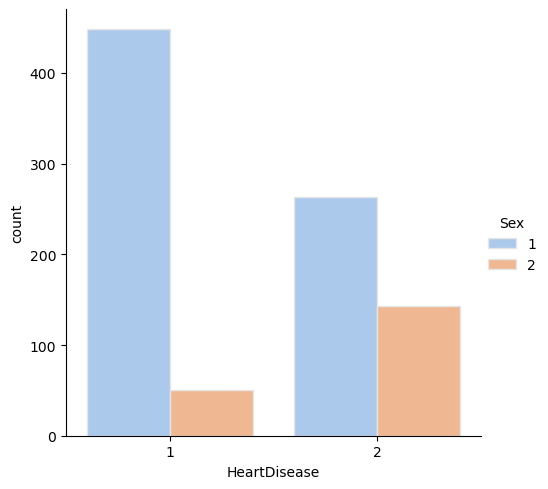

<Figure size 300x400 with 0 Axes>

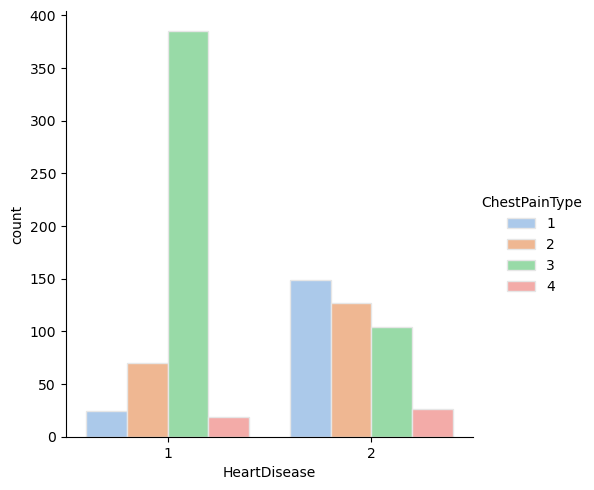

<Figure size 300x400 with 0 Axes>

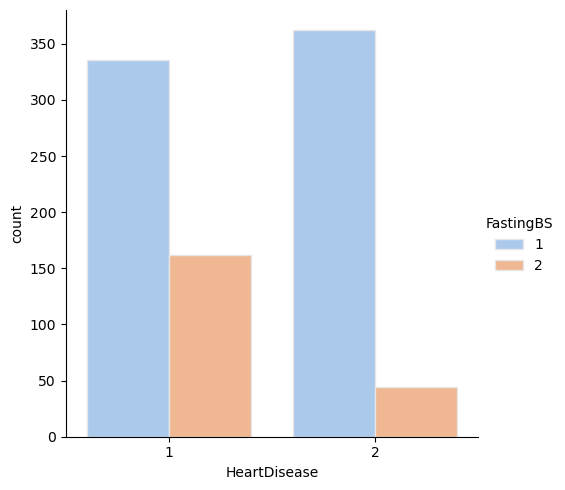

<Figure size 300x400 with 0 Axes>

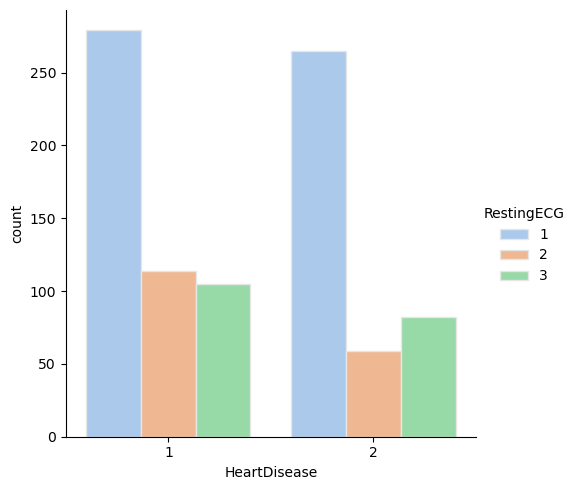

<Figure size 300x400 with 0 Axes>

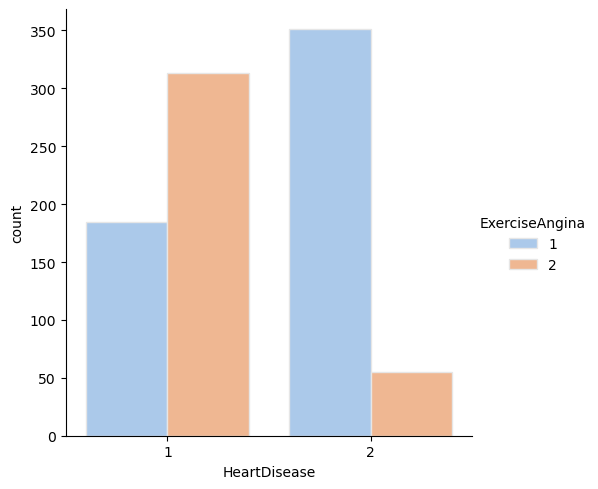

<Figure size 300x400 with 0 Axes>

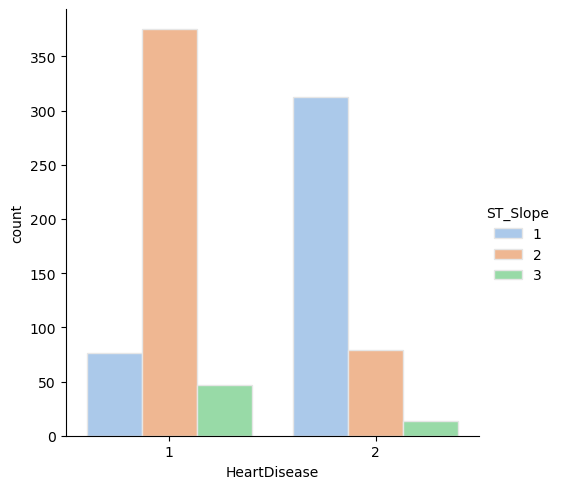

In [506]:
for i in range(0,7) :
    if i < 6 :
         # Set up a new figure for the count plot with specified dimensions
        plt.figure(figsize=(3,4))
         # Create a categorical count plot using seaborn
        # 'HeartDisease' is plotted on the x-axis, and the hue is determined by the category defined in df_cat_name[i]
        sns.catplot(x="HeartDisease", hue=df_cat_name[i], kind="count",palette="pastel", edgecolor=".9",data=df)
        plt.show()
    elif i==6 :
        pass

# Visualising numerical Data

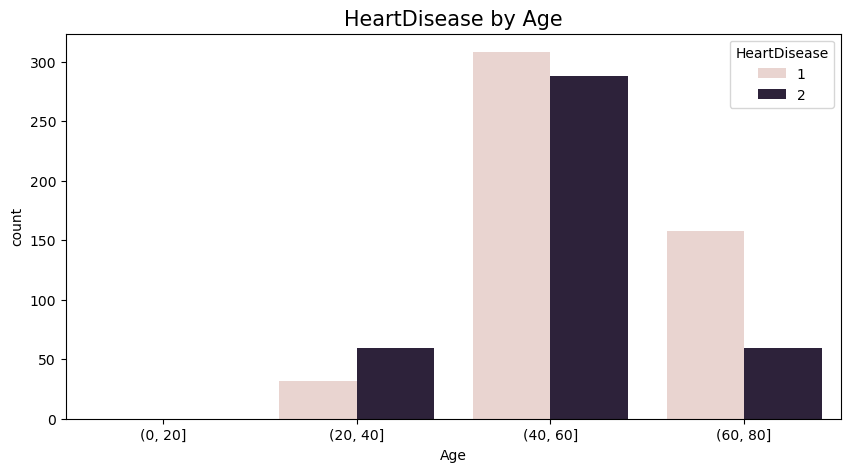

In [507]:
# Set up a new figure for the count plot with specified dimensions
plt.figure(figsize=(10,5))
# Define bins for categorizing ages into intervals
bins=[0, 20, 40, 60, 80]
# Create a count plot using seaborn
# The x-axis represents age categories defined by the bins, and the hue represents the presence of heart disease
sns.countplot(x=pd.cut(df.Age,bins=bins),hue=df.HeartDisease)
plt.title("HeartDisease by Age", fontsize=15)
plt.show()

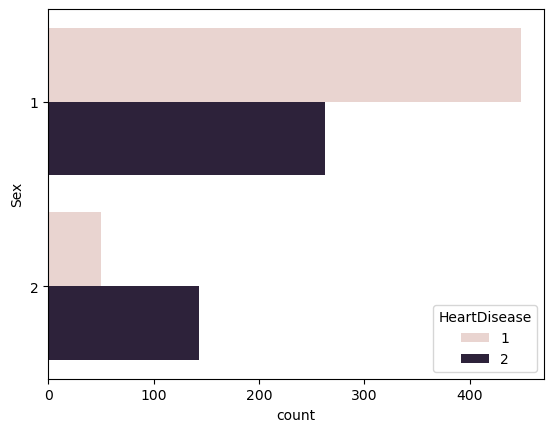

In [508]:
# Create a horizontal count plot using seaborn
# The y-axis represents the 'Sex' variable, and the hue distinguishes between those with and without heart disease
ax = sns.countplot(y="Sex", hue="HeartDisease", data=df)

# Box Plot

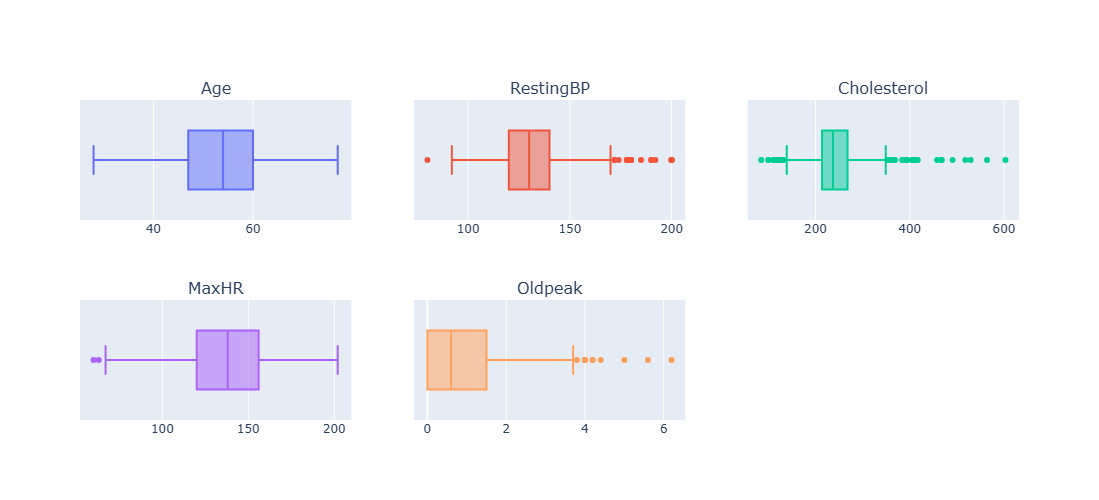

In [509]:
# Set up the subplots grid
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=3, 
                    # Set the subplot titles
                    subplot_titles=['Age', 'RestingBP', 'Cholesterol','MaxHR','Oldpeak'])
#create boxplot visualization of numeric columns
fig.add_trace(go.Box(x=df.Age, name='', showlegend=False), row=1, col=1)
fig.add_trace(go.Box(x=df.RestingBP, name='', showlegend=False), row=1, col=2)
fig.add_trace(go.Box(x=df.Cholesterol, name='', showlegend=False), row=1, col=3)
fig.add_trace(go.Box(x=df.MaxHR, name='', showlegend=False), row=2, col=1)
fig.add_trace(go.Box(x=df.Oldpeak, name='', showlegend=False), row=2, col=2)

#config size
fig.update_layout(height=500, width=1100)
#show visualizations
fig.show()

## Correlation

<Axes: >

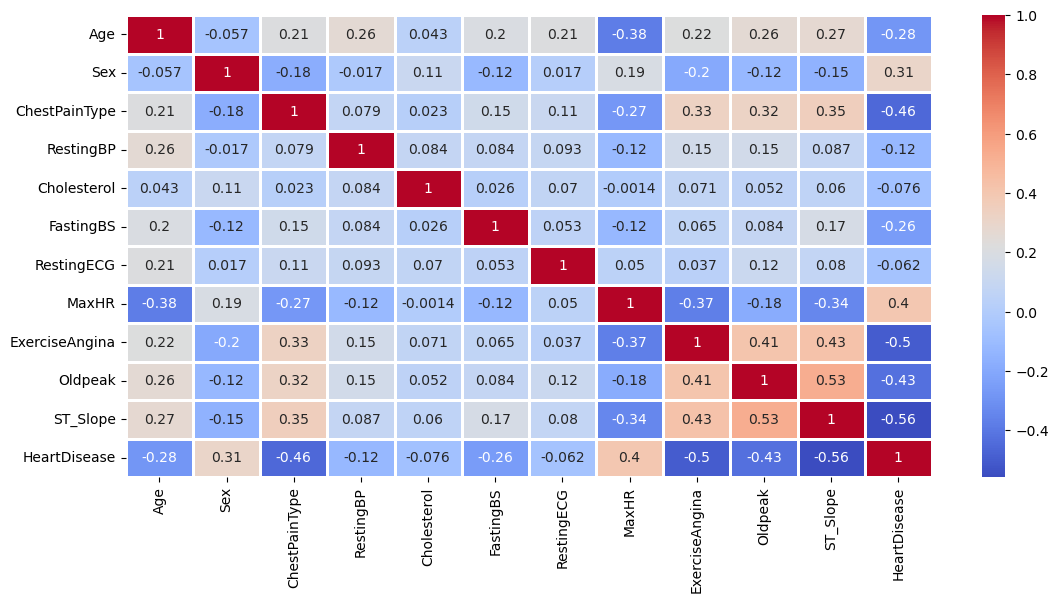

In [510]:
#Correlation between all features 
fig , ax = plt.subplots(figsize=(13,6))   
sns.heatmap(df.corr(), cmap="coolwarm", linecolor='white' , annot=True , linewidths=1 , ax=ax )

In [511]:
# Calculate the absolute correlation coefficients between all numerical columns and 'HeartDisease'
pd.DataFrame(abs(df.corr()['HeartDisease'])).T.round(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
HeartDisease,0.28,0.31,0.46,0.12,0.08,0.26,0.06,0.4,0.5,0.43,0.56,1.0


In [512]:
## Combining Data
df.agg(
    {
       "Age": ["min", "max", "median","mean", "skew", 'std'],
        "RestingBP": ["min", "max", "median", "mean","skew",'std'],
        "Cholesterol": ["min", "max", "median", "mean","skew",'std'],
        "Oldpeak": ["min", "max", "median", "mean","skew",'std'],
        "MaxHR": ["min", "max", "median", "mean","skew",'std']
    }
)

,Age,RestingBP,Cholesterol,Oldpeak,MaxHR
min,28.000000,80.000000,85.000000,0.000000,60.000000
max,77.000000,200.000000,603.000000,6.200000,202.000000
median,54.000000,130.000000,237.000000,0.600000,138.000000
mean,53.528761,132.806416,243.384956,0.913606,136.969027
skew,-0.193384,0.605859,1.435895,1.140450,-0.136971
std,9.431648,17.952414,53.738632,1.047342,25.337263


# Data Train and Test

In [513]:
x = df.drop('HeartDisease', axis=1)
y = df.HeartDisease

In [514]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)

# Feature Scaling with Normalization method

In [515]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.fit_transform(x_test)

In [516]:
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [517]:
print("x train : \n")
print(x_train.head())
print("x test : \n")
print(x_test.head())

x train : 

        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.428571  0.0       0.666667   0.500000     0.311065        0.0   
1  0.224490  0.0       0.000000   0.333333     0.248434        0.0   
2  0.714286  0.0       0.666667   0.500000     0.365344        0.0   
3  0.530612  0.0       0.666667   1.000000     0.235908        0.0   
4  0.530612  0.0       0.000000   0.933333     0.413361        0.0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0         0.0  0.553957             1.0  0.161290       0.5  
1         0.0  0.589928             0.0  0.000000       0.0  
2         0.5  0.352518             1.0  0.483871       0.5  
3         0.0  0.568345             1.0  0.322581       0.5  
4         1.0  0.949640             0.0  0.000000       0.0  
x test : 

        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.416667  0.0       0.666667   0.361702     0.210736        0.0   
1  0.479167  0.0       0.666667   0.361702  

# Logistic Regresssion

In [518]:
#Metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [519]:
from sklearn.linear_model import LogisticRegression

In [520]:
# Create and train a Logistic Regression model
LR_model = LogisticRegression(max_iter=7000)
LR_model.fit(x_train, y_train)

LogisticRegression(max_iter=7000)

In [521]:
#Predicting the test set result
df_logreg = pd.DataFrame()
penalty_param = ['l1', 'l2']
states_num = range(32,43)

for p in penalty_param :
    for  s in states_num :
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=s)
            logreg = LogisticRegression(solver='liblinear', max_iter=1000)
            logreg.fit(x_train, y_train)
            y_pred_logreg = logreg.predict(x_test)
            dict1 = {"Test Size": i, "Penalty":p, "Random State":s,
                     "Score" : logreg.score(x,y) , "Accuracy_score" : metrics.accuracy_score(y_test , y_pred_logreg )}
            df_logreg = pd.concat([df_logreg, pd.DataFrame([dict1])], ignore_index=True)


df_logreg.round(2)

,Test Size,Penalty,Random State,Score,Accuracy_score
0,6,l1,32,0.85,0.83
1,6,l1,33,0.86,0.88
2,6,l1,34,0.85,0.85
3,6,l1,35,0.85,0.84
4,6,l1,36,0.84,0.83
5,6,l1,37,0.85,0.86
6,6,l1,38,0.85,0.87
7,6,l1,39,0.85,0.85
8,6,l1,40,0.84,0.83
9,6,l1,41,0.85,0.85


In [522]:
#Removing the Accuracy_score which lower than 90 score , then sorting value base on Accuracy_score column
indx_names = df_logreg[df_logreg['Accuracy_score'] < 0.80].index
df_logreg.drop(indx_names, inplace = True)
df_logreg = df_logreg.sort_values(by='Accuracy_score', ascending=False)
df_logreg

,Test Size,Penalty,Random State,Score,Accuracy_score
12,6,l2,33,0.855088,0.875000
1,6,l1,33,0.855088,0.875000
17,6,l2,38,0.853982,0.871324
6,6,l1,38,0.853982,0.871324
16,6,l2,37,0.851770,0.863971
5,6,l1,37,0.851770,0.863971
18,6,l2,39,0.853982,0.852941
7,6,l1,39,0.853982,0.852941
13,6,l2,34,0.848451,0.849265
9,6,l1,41,0.852876,0.849265


In [523]:
#We choosing this with higher score 
df_logreg.loc[[17]]

,Test Size,Penalty,Random State,Score,Accuracy_score
17,6,l2,38,0.853982,0.871324


In [524]:
#you can see the green color for accuracy_score and score which sample are lower than 96% 
def highlight_greaterthan(x):
    if x.Accuracy_score < 0.85 :
        return ['background-color: seagreen']*5
    else:
        return ['background-color: dimgray']*5
df_logreg.style.apply(highlight_greaterthan, axis=1)

,Test Size,Penalty,Random State,Score,Accuracy_score
12,6,l2,33,0.855088,0.875000
1,6,l1,33,0.855088,0.875000
17,6,l2,38,0.853982,0.871324
6,6,l1,38,0.853982,0.871324
16,6,l2,37,0.851770,0.863971
5,6,l1,37,0.851770,0.863971
18,6,l2,39,0.853982,0.852941
7,6,l1,39,0.853982,0.852941
13,6,l2,34,0.848451,0.849265
9,6,l1,41,0.852876,0.849265


In [525]:
#I picking this row 
df_logreg.loc[[20]]

,Test Size,Penalty,Random State,Score,Accuracy_score
20,6,l2,41,0.852876,0.849265


In [526]:
#Selecting above value and putting those for get some new results
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=34)
classifier_1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
classifier_1.fit(x_train, y_train)
y_pred_1 = classifier_1.predict(x_test)

log_train = round(classifier_1.score(x_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_1, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_1, y_test) * 100, 2)

print("Training Accuracy    :",log_train,"%")
print("Model Accuracy Score :",log_accuracy,"%\n")
print("--------------------------------------------------------\n")
print("Classification_Report: \n",classification_report(y_test,y_pred_1))

Training Accuracy    : 85.13 %
Model Accuracy Score : 84.93 %

--------------------------------------------------------

Classification_Report: 
               precision    recall  f1-score   support

           1       0.87      0.85      0.86       147
           2       0.83      0.85      0.84       125

    accuracy                           0.85       272
   macro avg       0.85      0.85      0.85       272
weighted avg       0.85      0.85      0.85       272



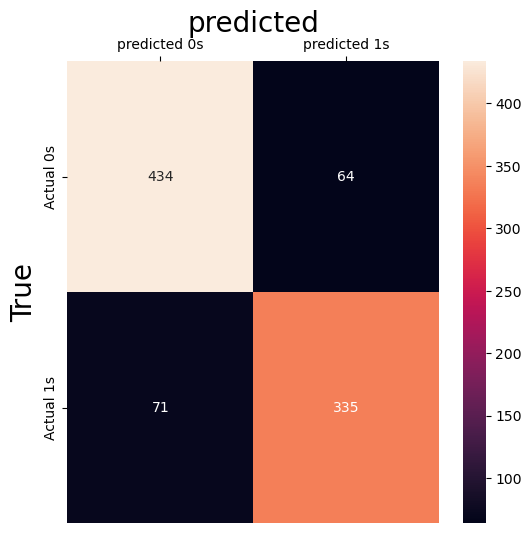

In [527]:
#another confusion matrix with sns.heatmap
c_matrix = confusion_matrix(y,classifier_1.predict(x))

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(c_matrix , annot=True , ax=ax , fmt='d')
ax.set_xlabel("predicted" , fontsize=20)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticklabels(['predicted 0s', 'predicted 1s'], fontsize = 10)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'], fontsize = 10)

plt.show()

In [528]:
print('Confusion matrix:\n\n', c_matrix)
print("-----------------------------")
print('\nTrue Positives(TP) = ', c_matrix[0,0])
print("-----------------------------")
print('\nTrue Negatives(TN) = ', c_matrix[1,1])
print("-----------------------------")
print('\nFalse Positives(FP) = ', c_matrix[0,1])
print("-----------------------------")
print('\nFalse Negatives(FN) = ', c_matrix[1,0])

Confusion matrix:

 [[434  64]
 [ 71 335]]
-----------------------------

True Positives(TP) =  434
-----------------------------

True Negatives(TN) =  335
-----------------------------

False Positives(FP) =  64
-----------------------------

False Negatives(FN) =  71


# Modeling

In [529]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=34)

# Random Forest

In [530]:
# Create and train a Random Forest Classifier model
RFC_model = RandomForestClassifier()
RFC_model.fit(x_train, y_train)

RandomForestClassifier()

In [531]:
# Make predictions on the test set
RFC_y_pred =RFC_model.predict(x_test)

In [532]:
RFC_train_preds = RFC_model.predict(x_train)
RFC_train_preds

array([2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1,

In [533]:
RFC_test_preds = RFC_model.predict(x_test)
RFC_test_preds

array([2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 1], dtype=int64)

In [534]:
RFC_train_preds_score = RFC_model.score(x_train,y_train)
RFC_train_preds_score

1.0

In [535]:
RFC_test_preds_score = RFC_model.score(x_test,y_test)
RFC_test_preds_score

0.8713235294117647

In [536]:
# Compute the confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, RFC_y_pred)

In [537]:
# Create a DataFrame for the confusion matrix (optional)
confusion_df_rfc = pd.DataFrame(conf_matrix_rfc, index=RFC_model.classes_, columns=RFC_model.classes_)


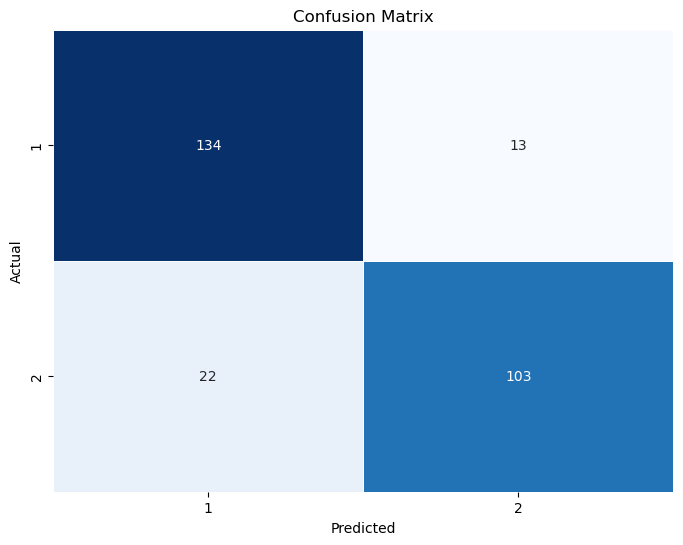

In [538]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df_rfc, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [539]:
# Evaluate the model
accuracy_rfc = accuracy_score(y_test, RFC_y_pred)
classification_rep_rfc = classification_report(y_test, RFC_y_pred)
confusion_mat_rfc = confusion_matrix(y_test, RFC_y_pred)


In [540]:
# Print the results
print(f"Accuracy: {accuracy_rfc:.2f}")
print("Classification Report:\n", classification_rep_rfc)
print("Confusion Matrix:\n", confusion_mat_rfc)

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.91      0.88       147
           2       0.89      0.82      0.85       125

    accuracy                           0.87       272
   macro avg       0.87      0.87      0.87       272
weighted avg       0.87      0.87      0.87       272

Confusion Matrix:
 [[134  13]
 [ 22 103]]
